<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC1</p>
<p style="margin: 0; text-align:right;">2020-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Preparación de datos

A lo largo de esta práctica veremos cómo aplicar diferentes tecnicas para la carga y preparación de datos:

 <ol start="1">
  <li>Carga de un conjunto de datos</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis exploratorio de los datos
  <li>Reducción de la dimensionalidad</li>
  <li>Entrenamiento y test</li>
</ol>
   
**Importante:** Cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a html desde el menú File $\to$ Download as $\to$ HTML.

Para realizar esta PEC, necesitaremos las siguientes librerías:

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Nombre y apellidos: Francisco Javier Melchor González</strong>
</div>

In [63]:
from IPython.display import Image 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from six import StringIO
import pydotplus

import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

%matplotlib inline

# 1. Carga del conjunto de datos (1 punto)

En primer lugar, debéis cargar el conjunto de datos Wine recognition (más información en el enlace [https://archive.ics.uci.edu/ml/datasets/Wine](https://archive.ics.uci.edu/ml/datasets/Wine)). Se puede descargar de internet o se puede cargar directamente desde la librería "scikit-learn", que incorpora un conjunto de datasets muy conocidos y usados para la minería de datos y machine learning: [http://scikit-learn.org/stable/datasets/index.html](http://scikit-learn.org/stable/datasets/index.html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Cargad el conjunto de datos "Wine Recognition" y mostrad:
    
<br> - el número y nombre de los atributos (variables que podrían ser usadas para predecir la respuesta "wine_class")
<br> - el número de filas del conjunto de datos
<br> - verificad si hay o no "missing values" y en qué columnas
<hr>
Sugerencia: Si usáis sklearn (sklearn.datasets.load_wine), explorad las diferents 'keys' del objecto obtenido.
    
Sugerencia: Igual os resulta útil pasar los datos (atributos + target) a un dataframe de pandas.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong> Solución: <strong>
</div>

* **Carga de datos:**

In [2]:
wine = pd.read_csv('../data/wine.csv')
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


* **Número y nombre de los atributos (variables que podrían ser usadas para predecir la respuesta "wine_class")**

In [3]:
len(wine.columns[1:])

13

In [4]:
wine.columns[1:]

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

* **El número de filas del conjunto de datos**

In [5]:
len(wine)

178

* **Verificad si hay o no "missing values" y en qué columnas**

In [6]:
wine.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

El método anterior genera la suma de todos los elementos con valor "NA" para cada una de las columnas presentes en el dataset, como se puede observar todas las columnas tienen un valor 0 a la derecha, lo que indica que no existen valores NA en este dataset

# 2. Análisis de los datos (3 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Realizad un análisis estadístico básico: 
<br> - Variables categóricas:
    
            - Calculad la frecuencia.
            - Haced un gráfico de barras.
<br> - Variables numéricas:
            - Calculad estadísticos descriptivos básicos: media, mediana, desviación estándar, ...
            - Haced un histograma de las variables: alcohol, magnesium y color_intensity
<hr>
Sugerencia: podéis usar la librería 'pandas' y sus funciones 'describe' y 'value_counts'
</div>

In [7]:
wine.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

### Variables categóricas

In [8]:
wine['Wine'] = wine['Wine'].astype('category')

In [9]:
wine['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

<AxesSubplot:>

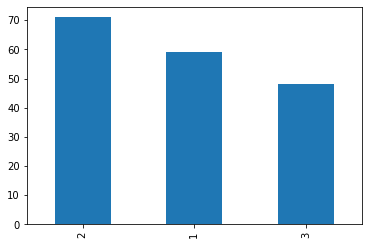

In [10]:
wine['Wine'].value_counts().plot(kind='bar')

### Variables numéricas

In [11]:
wine.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
wine_selected = wine[['Alcohol','Mg','Color.int']]

array([[<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Mg'}>],
       [<AxesSubplot:title={'center':'Color.int'}>, <AxesSubplot:>]],
      dtype=object)

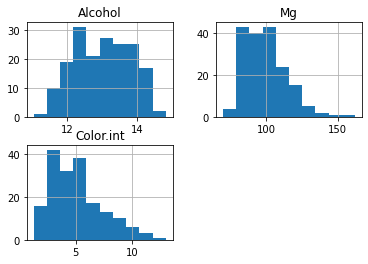

In [13]:
wine_selected.hist()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Comentad los resultados.
</div>

## 2.2 Análisis exploratorio de los datos

En este ejercicio exploraremos la relación de algunos de los atributos numéricos con la variable respuesta ("wine_class"), tanto gráficamente como cualitativamente, y analizaremos las diferentes correlaciones. Para empezar, seleccionaremos sólo 3 atributos para explorar: alcohol, magnesium y color_intensity.

In [14]:
feats_to_explore = ['alcohol', 'magnesium', 'color_intensity']

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Usando una librería gráfica, como por ejemplo "matplotlib", realizad un gráfico del histograma de valores para cada uno de los atributos seleccionados, separados por los valores de la clase respuesta. Los tres gráficos tienen que estar sobrepuestos, es decir, por ejemplo, en el histograma de la feature "alcohol" tiene que haber en un solo gráfico tres histogramas, uno por cada clase de vino. Añadid una leyenda para saber a qué clase corresponde cada histograma.
    
La finalidad es observar cómo se distribuye cada uno de los atributos en función de la clase que tengan, para poder identificar de manera visual y rápida si algunos atributos permiten diferenciar de forma clara las diferentes clases de vinos.
    
<hr>
Sugerencia: podéis usar el parámetro "alpha" en los gráficos para que se aprecien los tres histogramas.
</div>

In [15]:
wine.rename(columns={"Alcohol":"alcohol", "Mg":"magnesium", "Color.int":"color_intensity"},inplace=True)

In [16]:
feats_to_analysis = feats_to_explore.copy()

In [17]:
feats_to_analysis.append('Wine')

In [18]:
wine_analysis = wine[feats_to_analysis]

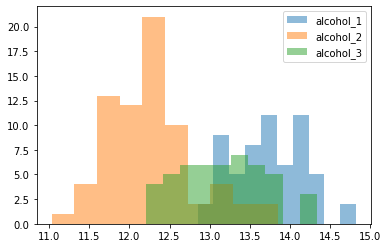

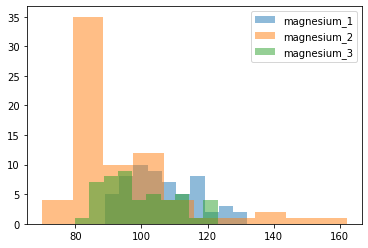

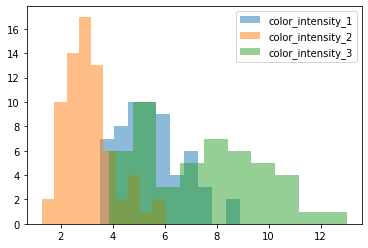

In [19]:
for col in wine_analysis:
    if col != 'Wine':
        plt.hist(wine_analysis[wine_analysis['Wine'] == 1][col], label = col + '_1', alpha=0.5)
        plt.hist(wine_analysis[wine_analysis['Wine'] == 2][col], label = col + '_2', alpha=0.5)
        plt.hist(wine_analysis[wine_analysis['Wine'] == 3][col], label = col + '_3', alpha=0.5)
        plt.legend(loc='upper right')
        plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿qué atributo parece tener más peso a la hora de clasificar un vino? ¿Cuál parece tener menos peso? 
</div>

Si observamos los histogramas obtenidos __el atributo que parece tener más peso a la hora de clasificar el vino es el alcohol__, pues se puede ver que los 3 gráficos generados por cada uno de los valores de la variable Wine son los que más separados se encuentran unos de otros, con respecto a los 3 gráficos para las demás variables

Por otro lado, __el atributo que parece tener menos peso a la hora de clasificar el vino es el magnesium__, pues se puede ver que los 3 gráficos generados por cada uno de los valores de la variable Wine son los que más superpuestos se encuentran entre ellos, con respecto a los 3 gráficos generados para las demás variables

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Usando los histogramas anteriores, añadid una línea vertical indicando la media de cada uno de los histogramas (tres por gráfico). Pintad las líneas del mismo color que el histograma para que quede claro a cuál hacen referencia.
    
Añadid a la leyenda la clase de vino y la desviación estándar en cuestión.

La finalidad es verificar numéricamente las diferencias identificadas anteriormente de forma visual.
    
<hr>
Sugerencia: podeis usar "axvline", de matplotlib axis, para las líneas verticales.
</div>

In [20]:
import statistics

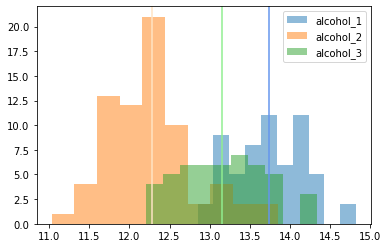

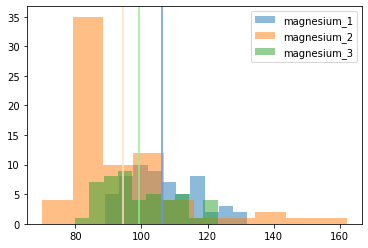

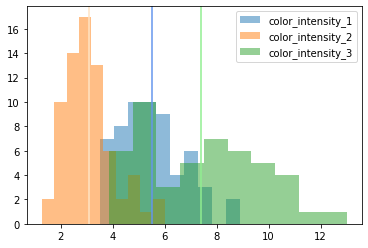

In [21]:
for col in wine_analysis:
    if col != 'Wine':
        plt.hist(wine_analysis[wine_analysis['Wine'] == 1][col], label = col + '_1', alpha=0.5)
        plt.axvline(statistics.mean(wine_analysis[wine_analysis['Wine'] == 1][col]), color= 'cornflowerblue')
        plt.hist(wine_analysis[wine_analysis['Wine'] == 2][col], label = col + '_2', alpha=0.5)
        plt.axvline(statistics.mean(wine_analysis[wine_analysis['Wine'] == 2][col]), color= 'bisque')
        plt.hist(wine_analysis[wine_analysis['Wine'] == 3][col], label = col + '_3', alpha=0.5)
        plt.axvline(statistics.mean(wine_analysis[wine_analysis['Wine'] == 3][col]), color= 'lightgreen')
        plt.legend(loc='upper right')
        plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Calculad y mostrad la correlación entre las tres variables que estamos analizando.
</div>

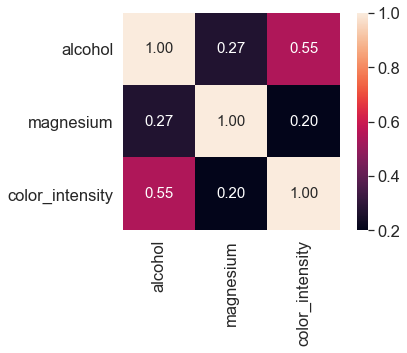

In [22]:
cm = np.corrcoef(wine_analysis[feats_to_explore].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
cbar=True,
annot=True,
square=True,
fmt='.2f',
annot_kws={'size': 15},
yticklabels=feats_to_explore,
xticklabels=feats_to_explore)
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Representad gráficamente las relaciones entre estas variables (scatterplots). Diferenciad con colores diferentes las diferentes clases.
    
La finalidad es poder observar y analizar las correlaciones de manera gráfica entre algunas de las variables.
    
<hr>Sugerencia: podéis usar la función "pairplot" de la librería 'seaborn' con el parámetro "hue".
</div>

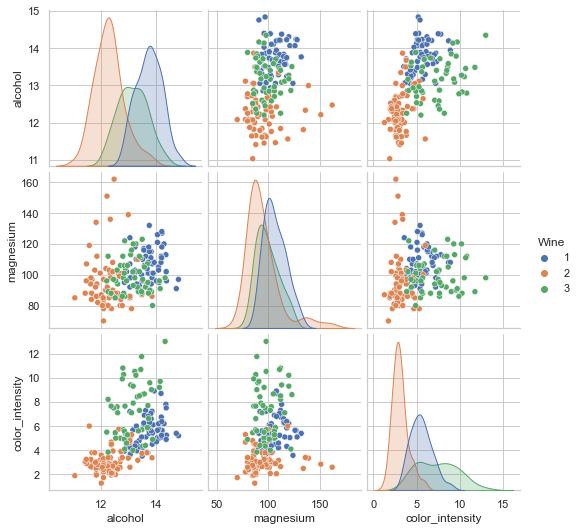

In [23]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(wine_analysis, hue='Wine')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Representad en 3D las tres variables. Poned nombres en los ejes y diferenciad con colores diferentes las diferentes clases de vino.
    
La finalidad es complementar los gráficos anteriores y poder observar qué variables discriminan mejor entre las tres clases de vino.
</div>

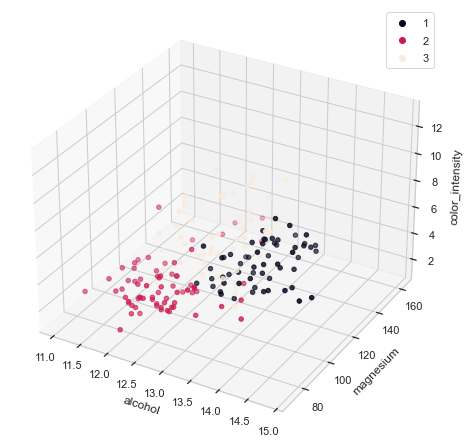

In [24]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

x = wine_analysis[feats_to_explore[0]]
y = wine_analysis[feats_to_explore[1]]
z = wine_analysis[feats_to_explore[2]]

ax.set_xlabel(feats_to_explore[0])
ax.set_ylabel(feats_to_explore[1])
ax.set_zlabel(feats_to_explore[2])

sc = ax.scatter(x, y, z, c=wine_analysis['Wine'])
plt.legend(*sc.legend_elements())

plt.show()


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando las correlaciones, ¿qué variables son las que tienen una correlación más fuerte? ¿Cuadra el resultado numérico con los gráficos obtenidos?
</div>

# 3. Reducción de la dimensionalidad (3 puntos)

En este ejercicio se aplicarán métodos de reducción de la dimensionalidad al conjunto original de datos. El objetivo es reducir el conjunto de atributos a un nuevo conjunto con menos dimensiones. Así en vez de trabajar con 3 variables elegidas al azar, usaremos la información de todos los atributos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Aplicad el método de reducción de la dimensionalidad, Principal Component Analysis (PCA), para reducir a 2 dimensiones el dataset entero con todas las features. Generad un gráfico en 2D con el resultado del PCA usando colores diferentes para cada una de las clases de la respuesta (wine_class), con el objetivo de visualizar si es posible separar eficientemente las clases con este método.
    
NOTA: Tened cuidado y no incluyáis la variable objetivo "wine class" a la reducción de dimensionalidad. Queremos poder explicar la variable objetivo en funcion del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No es necesario que programéis el algoritmo, podéis usar la implementación disponible en la librería de "scikit-learn".
</div>

In [25]:
pca = PCA(n_components=2)
wine_pca = pca.fit(wine[wine.columns[1:]]).transform(wine[wine.columns[1:]])

In [26]:
wine_pca = pd.DataFrame(data = wine_pca, columns=['independent_feature_1', 'independent_feature_2'])
wine_pca['Wine'] = wine.Wine

<AxesSubplot:xlabel='independent_feature_1', ylabel='independent_feature_2'>

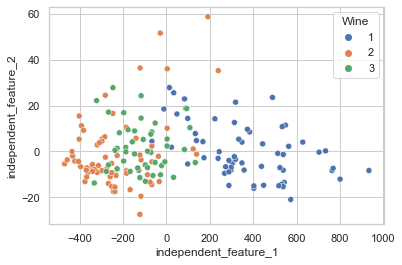

In [27]:
sns.scatterplot(data=wine_pca, x="independent_feature_1", y="independent_feature_2", hue="Wine")


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Repetid la reducción de dimensionalidad, pero en este caso usando TSNE.  Podéis encontrar más información sobre este algoritmo en el link:
    
[https://distill.pub/2016/misread-tsne/](https://distill.pub/2016/misread-tsne/)

Igual que antes, generad un gráfico en 2D con el resultado del PCA usando colores diferentes para cada una de las clases de la respuesta (wine_class), con el objetivo de visualizar si es posible separar eficientemente las clases con este método. 

<hr>
Sugerencia: No es necesario que programéis el algoritmo, podéis usar la implementación disponible en la librería de "scikit-learn".

Sugerencia: A parte de especificar el número de componentes, probad a usar el parámetro "perplexity".
</div>

In [28]:
tsne = TSNE(n_components=2)
wine_tsne = tsne.fit_transform(wine[wine.columns[1:]])

In [29]:
wine_tsne = pd.DataFrame(data = wine_tsne, columns=['independent_feature_1', 'independent_feature_2'])
wine_tsne['Wine'] = wine.Wine

<AxesSubplot:xlabel='independent_feature_1', ylabel='independent_feature_2'>

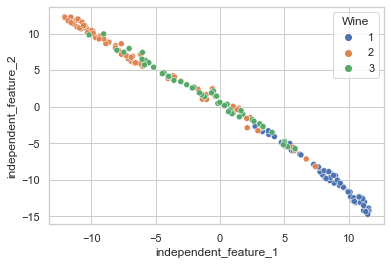

In [30]:
sns.scatterplot(data=wine_tsne, x="independent_feature_1", y="independent_feature_2", hue="Wine")


In [31]:
wine['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [32]:
tsne = TSNE(n_components=2, perplexity=50)
wine_tsne = tsne.fit_transform(wine[wine.columns[1:]])

In [33]:
wine_tsne = pd.DataFrame(data = wine_tsne, columns=['independent_feature_1', 'independent_feature_2'])
wine_tsne['Wine'] = wine.Wine

<AxesSubplot:xlabel='independent_feature_1', ylabel='independent_feature_2'>

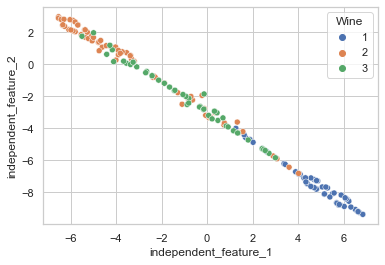

In [34]:
sns.scatterplot(data=wine_tsne, x="independent_feature_1", y="independent_feature_2", hue="Wine")


In [35]:
tsne = TSNE(n_components=2, perplexity=71)
wine_tsne = tsne.fit_transform(wine[wine.columns[1:]])

In [36]:
wine_tsne = pd.DataFrame(data = wine_tsne, columns=['independent_feature_1', 'independent_feature_2'])
wine_tsne['Wine'] = wine.Wine

<AxesSubplot:xlabel='independent_feature_1', ylabel='independent_feature_2'>

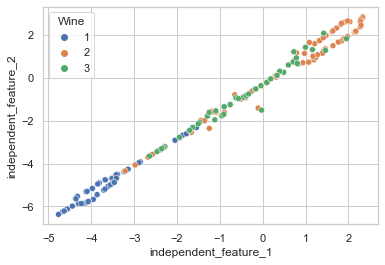

In [37]:
sns.scatterplot(data=wine_tsne, x="independent_feature_1", y="independent_feature_2", hue="Wine")


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿crees que ha funcionado bien la reducción de dimensionalidad? ¿Ha conseguido separar las clases correctamente? ¿Cuál de los dos métodos ha funcionado mejor?
    
¿Por qué obtenemos resultados tan diferentes?
</div>

# 4. Entrenamiento y test (3 puntos)

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el clasificador Decision Tree (un árbol de decisión), para predecir la clase a la que pertenece cada vino y evaluar la precisión obtenida con el modelo. Para eso usaremos:

    - El conjunto de datos original con todos los atributos
    - El conjunto de datos reducido a sólo 2 atributos con PCA
    - El conjunto de datos reducido a sólo 2 atributos con TSNE

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Usando el conjunto de datos original:
    
 - Dividid el dataset en train y test.
 - Definid un modelo Decision Tree (fijando max_depth = 5 para mantener el modelo simple).
 - Aplicad validación cruzada con el modelo definido y el dataset de train (con cv=5 ya es suficiente).
 - Calculad la media y la desviación estándar de la validación cruzada.
    
<hr>
Sugerencia: Para separar entre train y test podéis usar train_test_split de sklearn.

Sugerencia: Para entrenar un modelo decision tree podéis usar 'DecisionTreeClassifier' de sklearn.

Sugerencia: Para aplicar validación cruzada podéis usar 'cross_val_score' de sklearn.
</div>

In [38]:
X_train, X_test, y_train, y_test = train_test_split(wine[wine.columns[1:]], wine['Wine'], test_size=0.3, random_state=1)

In [39]:
dt_clf = DecisionTreeClassifier(max_depth = 5)

cv_scores = cross_val_score(dt_clf, X_train, y_train, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(cv_scores.mean(),
                                          cv_scores.std()),
                                          end="\n\n" )

mean: 0.904 (std: 0.054)



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Haced el fit con todo el conjunto de train, y generad el árbol de decisión correspondiente.
    
<hr>
Sugerencia: Para dibujar árboles de decisión, ver este link:

https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc

</div>

In [40]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

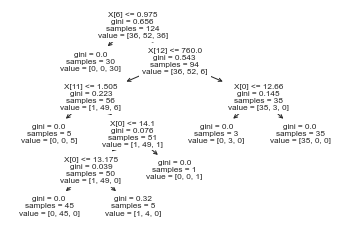

In [41]:
tree.plot_tree(dt_clf);


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Repetid el mismo procedimiento que en el ejercicio anterior con el dataset reducido a 2 dimensiones con PCA.
</div>

In [42]:
X_train, X_test, y_train, y_test = train_test_split(wine_pca[wine_pca.columns[0:2]], wine_pca['Wine'], test_size=0.3, random_state=1)

In [43]:
dt_clf_pca = DecisionTreeClassifier(max_depth = 5)

cv_scores = cross_val_score(dt_clf_pca, X_train, y_train, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(cv_scores.mean(),
                                          cv_scores.std()),
                                          end="\n\n" )

mean: 0.709 (std: 0.094)



In [44]:
dt_clf_pca.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

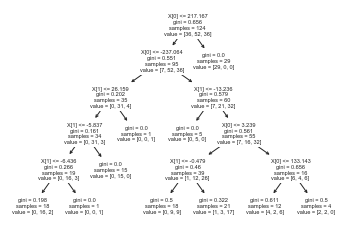

In [45]:
tree.plot_tree(dt_clf_pca);


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Repetid el mismo procedimiento que en el ejercicio anterior con el dataset reducido a 2 dimensiones con TSNE.
</div>

In [46]:
X_train, X_test, y_train, y_test = train_test_split(wine_tsne[wine_tsne.columns[0:2]], wine_tsne['Wine'], test_size=0.3, random_state=1)

In [47]:
dt_clf_tsne = DecisionTreeClassifier(max_depth = 5)

cv_scores = cross_val_score(dt_clf_tsne, X_train, y_train, cv=5)
print("mean: {:.3f} (std: {:.3f})".format(cv_scores.mean(),
                                          cv_scores.std()),
                                          end="\n\n" )

mean: 0.701 (std: 0.097)



In [48]:
dt_clf_tsne.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

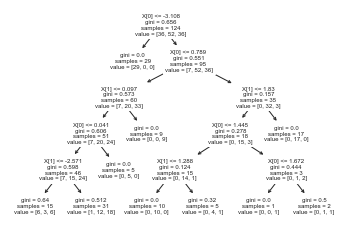

In [49]:
tree.plot_tree(dt_clf_tsne);


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Con qué datos ha funcionado mejor? ¿Tiene sentido? ¿Cuadra con los resultados que hemos visto en el ejercicio 3?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> Con el mejor modelo que hayáis obtenido:
    
 - Generad predicciones sobre el dataset de test.
 - Calculad la precisión de las predicciones obtenidas y la matriz de confusión asociada.
 
<hr>
Sugerencia: Para calcular la precisión y la matriz de confusión podéis usar las funciones dentro del módulo "metrics" de sklearn.
</div>

In [53]:
X_train, X_test, y_train, y_test = train_test_split(wine[wine.columns[1:]], wine['Wine'], test_size=0.3, random_state=1)

In [54]:
scores = dt_clf.predict(X_test)

In [55]:
wine['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [96]:
def print_metrics(labels, scores):
    conf = confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                        Class 1          Class 2          Class 3')
    print('Actual Class 1        %6d' % conf[0,0] + '             %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Class 2        %6d' % conf[1,0] + '             %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Class 3        %6d' % conf[2,0] + '             %5d' % conf[2,1] + '             %5d' % conf[2,2])

    print('')
    print('Accuracy        %0.2f' % accuracy_score(labels, scores))
    metrics = precision_recall_fscore_support(labels, scores)
    print(' ')
    print('           Class 1                  Class 2                Class 3')
    print('Num case   %0.2f' % metrics[3][0] + '                     %0.2f' % metrics[3][1] + '                  %0.2f' % metrics[3][2] )
    print('Precision   %0.2f' % metrics[0][0] + '                      %0.2f' % metrics[0][1] + '                   %0.2f' % metrics[0][2] )
    print('Recall      %0.2f' % metrics[1][0] + '                      %0.2f' % metrics[1][1] + '                   %0.2f' % metrics[1][2] )
    print('F1          %0.2f' % metrics[2][0] + '                      %0.2f' % metrics[2][1] + '                   %0.2f' % metrics[2][2] )

In [97]:
print_metrics(y_test, scores)  

                 Confusion matrix
                        Class 1          Class 2          Class 3
Actual Class 1            21                 1                 1
Actual Class 2             1                17                 1
Actual Class 3             0                 1                11

Accuracy        0.91
 
           Class 1                  Class 2                Class 3
Num case   23.00                     19.00                  12.00
Precision   0.95                      0.89                   0.85
Recall      0.91                      0.89                   0.92
F1          0.93                      0.89                   0.88
